# Heart disease prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory Data Analysis

In [3]:
# The data contains 303 rows with 14 columns
# 9 columns are categorical
# 5 are numerical

In [4]:
num_features = ['age','trtbps','chol','thalachh','oldpeak']
cat_features = ['sex','cp','fbs','restecg','exng','slp','caa','thall','output']
multi_cat_features = ['cp','restecg','slp','caa','thall']

In [5]:
df[cat_features]=df[cat_features].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trtbps    303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalachh  303 non-null    int64   
 8   exng      303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slp       303 non-null    category
 11  caa       303 non-null    category
 12  thall     303 non-null    category
 13  output    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 15.8 KB


In [7]:
df[num_features].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [8]:
df[cat_features].describe()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


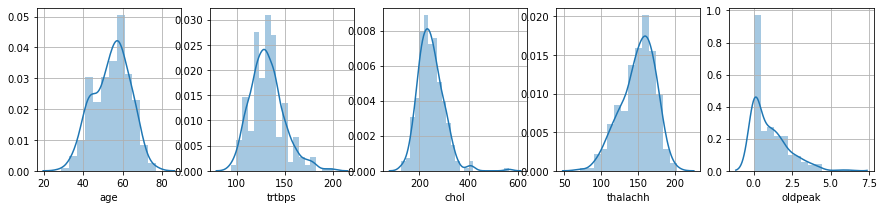

In [9]:
plt.figure(figsize=(15,3))
j = 0
for i in num_features:
    j = j+1
    plt.subplot(1,5,j)
    sns.distplot(df[i])
    plt.grid()

In [10]:
df_0 = df[df['output']==0]
df_1 = df[df['output']==1]

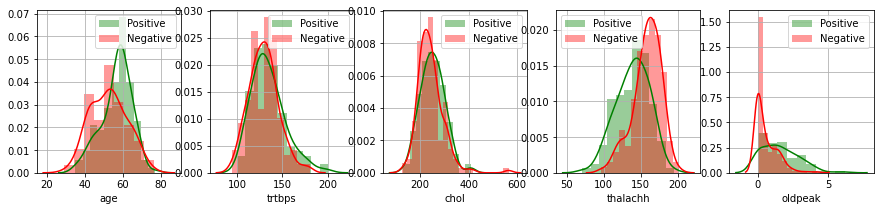

In [11]:
plt.figure(figsize=(15,3))
j = 0
for i in num_features:
    j = j+1
    plt.subplot(1,5,j)
    sns.distplot(df_0[i],color='green',label='Positive')
    sns.distplot(df_1[i],color='red',label='Negative')
    plt.legend()
    plt.grid()

In [12]:
# The age, trtbps and chol follows normal distribution centered
# thalachh and old peak are skewed
# For later analysis , we will check if :
# - the age and the output are independent
# - the oldpeak and the output are independant

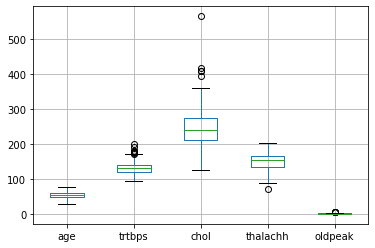

In [13]:
df[num_features].boxplot()

In [14]:
# trtbps, chol, thalachh and oldpeak have some outliers
# They will be fixed with RobustScaler when modelling

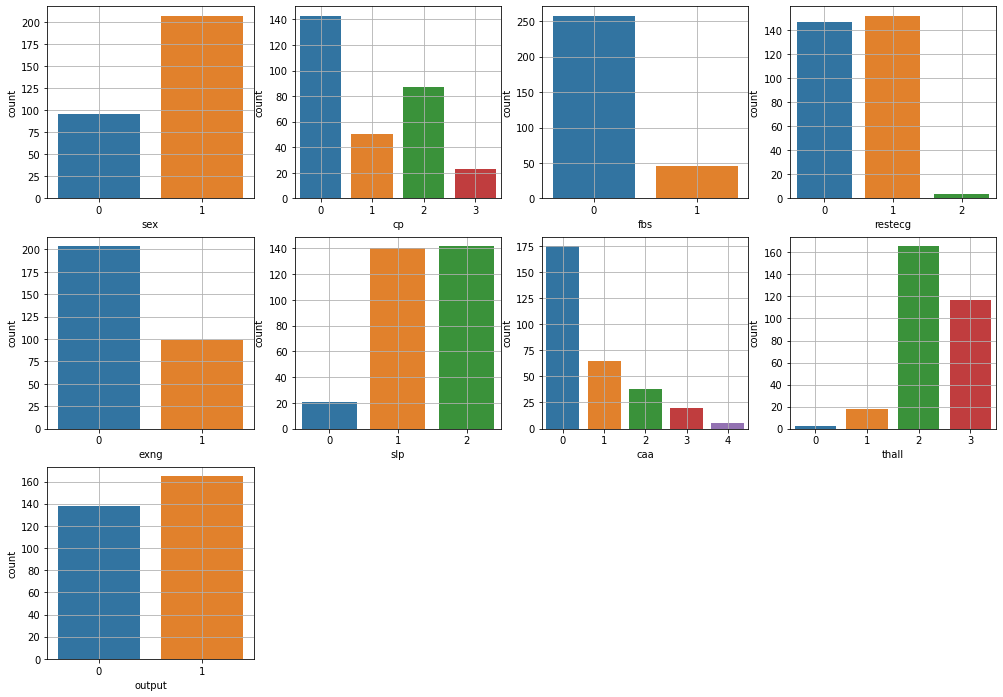

In [15]:
plt.figure(figsize=(17,12))
j = 0
for i in cat_features:
    j = j+1
    plt.subplot(3,4,j)
    sns.countplot(df[i])
    plt.grid()

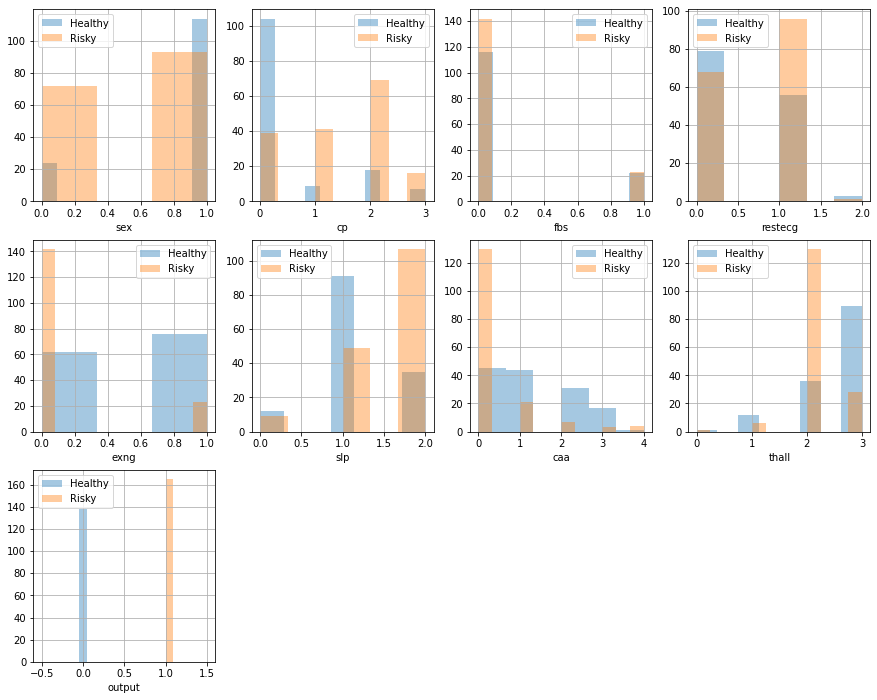

In [16]:
plt.figure(figsize=(15,12))
j = 0
for i in cat_features:
    j = j+1
    plt.subplot(3,4,j)
    sns.distplot(df_0[i],kde=False,label='Healthy')
    sns.distplot(df_1[i],kde=False,label='Risky')
    plt.grid()
    plt.legend()

In [17]:
# We will test an hypothesis which of these categorical variables is the most related to the output

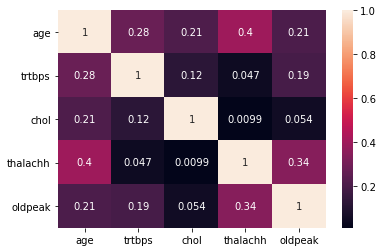

In [18]:
sns.heatmap(abs(df[num_features].corr()),annot=True)

### Hypothesis testing

In [19]:
# Let make a statistical test to understand the dependence between the Output and each input variables

In [20]:
from scipy.stats import ttest_ind

In [21]:
df_test = df.sample(303)
columns = df_test.drop(['output'],axis=1).columns

In [22]:
def t_test(col):
    alpha = 0.05
    stat,p = ttest_ind(df_test[col],df_test['output'])
    if p<alpha:
        return 'H0 rejected'
    else:
        return 0

In [23]:
for col in columns:
    print(f'{col :-<50} {t_test(col)}')

age----------------------------------------------- H0 rejected
sex----------------------------------------------- H0 rejected
cp------------------------------------------------ H0 rejected
trtbps-------------------------------------------- H0 rejected
chol---------------------------------------------- H0 rejected
fbs----------------------------------------------- H0 rejected
restecg------------------------------------------- 0
thalachh------------------------------------------ H0 rejected
exng---------------------------------------------- H0 rejected
oldpeak------------------------------------------- H0 rejected
slp----------------------------------------------- H0 rejected
caa----------------------------------------------- H0 rejected
thall--------------------------------------------- H0 rejected


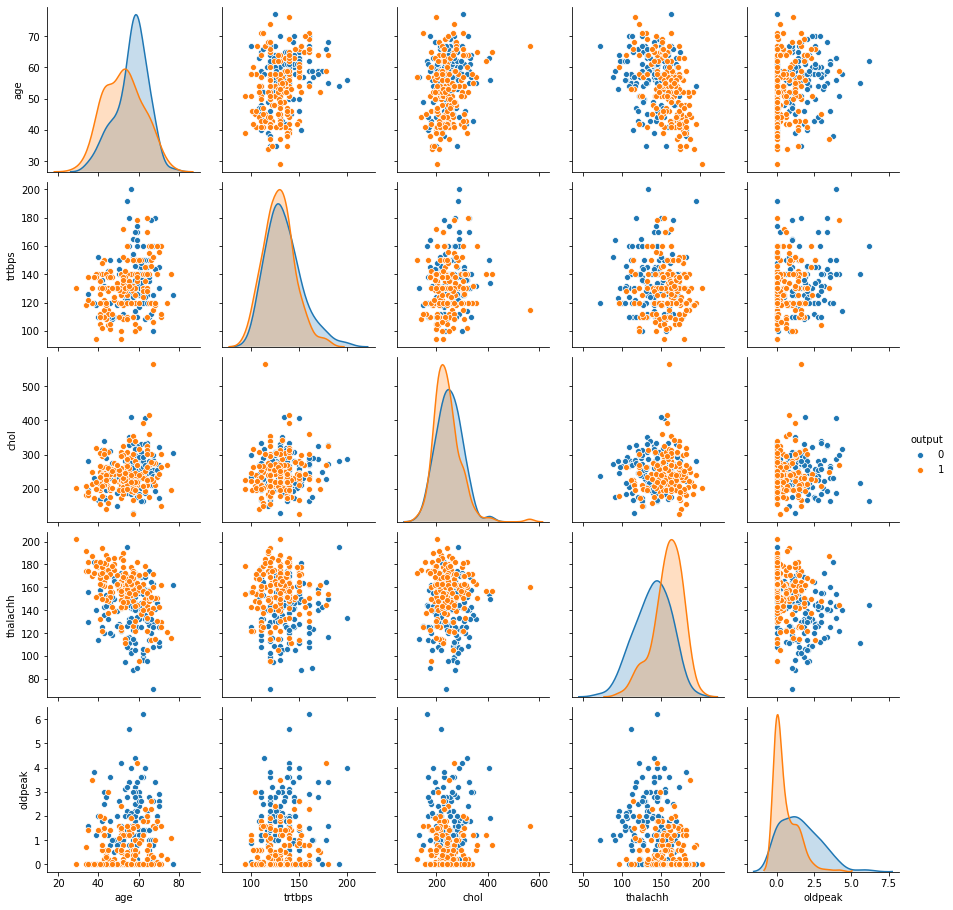

In [24]:
sns.pairplot(data = df,vars=num_features,hue='output')

## Model Building

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,RobustScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve
from sklearn.feature_selection import SelectFromModel,SelectKBest,f_classif
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.ensemble import IsolationForest

In [26]:
#Select a features for a specific transformer

In [28]:
num_pipeline = make_pipeline(MinMaxScaler(),RobustScaler())
cat_pipeline = make_pipeline(OneHotEncoder())
#transformer  = make_column_transformer((cat_pipeline,multi_cat_features),(num_pipeline,num_features))
cat_features = make_column_selector(dtype_include='category')
num_features = make_column_selector(dtype_exclude='category')
transformer = make_column_transformer((cat_pipeline,cat_features),(num_pipeline,num_features))
preprocessor = make_pipeline(transformer,SelectFromModel(SGDClassifier(),threshold='median'))
#preprocessor = make_pipeline(transformer)

In [29]:
df=df.drop_duplicates()
X = df.drop(['sex','output'],axis=1)
y = df[['output']].values.ravel()

### Remove Outliers with Isolation Forest

In [53]:
isf = make_pipeline(preprocessor,IsolationForest(contamination=0.01))
isf.fit(X,y)
clean_data = isf.predict(X)==1
X_clean = X[clean_data]
y_clean = y[clean_data]
X_outliers = X[clean_data==0]
y_outliers = y[clean_data==0]
X_clean = preprocessor.fit_transform(X_clean,y_clean)

In [34]:
#preprocessor.fit(X_clean,y_clean)
X_train,X_test,Y_train,Y_test = train_test_split(X_clean,y_clean,test_size=0.3,shuffle=True,stratify=y_clean)

In [35]:
# Those function are are used to plot learning curves (training score vs validation score), 
# test the model on the test set, and to optimize the model

In [36]:
def plot_learning_curve(model,X_train,Y_train,scoring='f1'):
    train_sizes = np.array([0.2,0.4,0.6,0.8,1])
    N,train_score,val_score=learning_curve(model,X_train,Y_train,scoring=scoring,train_sizes=train_sizes)
    plt.figure()
    plt.plot(N,train_score.mean(axis=1),color='orange',label='Training Score')
    plt.plot(N,val_score.mean(axis=1),color='blue',label='Validation Score')
    plt.xlabel('Training size')
    plt.ylabel(scoring)
    plt.legend()
    title = 'Learning Curve : {}'.format(str(model).replace('()',''))
    plt.title(title)
    plt.grid()
def testing(model,X_test,Y_test):
    print('----- Testing the model -----')
    y_pred = model.predict(X_test)
    print('Accuracy Score : ', model.score(X_test,Y_test))
    print('Classification reports: \n')
    print(classification_report(Y_test,y_pred))
    plt.figure(figsize=(3,3))
    plt.title('Confusion matrix')
    sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)
def optimize_model(model,X_train,Y_train,param_grid,scoring='recall'):
    gs = GridSearchCV(model,param_grid=grid,scoring=scoring)
    gs.fit(X_train,Y_train)
    print('Best Parameter: ',gs.best_params_)
    print('Best Score:',gs.best_score_)
    return gs.best_estimator_

def train_models(models,X_train,Y_train,scoring='f1'):
    keys = list(models.keys())
    ml_models = {}
    for k in keys:
        model = models[k]
        model.fit(X_train,Y_train)
        plot_learning_curve(model,X_train,Y_train,scoring=scoring)
        ml_models.update({k:model})
    return ml_models

### Model Building

In [37]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
models = {'knn':KNeighborsClassifier(),
          'logreg':LogisticRegression(),
          'decitree':DecisionTreeClassifier(),
          'sgd':SGDClassifier(),
          'svm':SVC(kernel='rbf',C=1.0,gamma=1.0),
          'rf':RandomForestClassifier()}

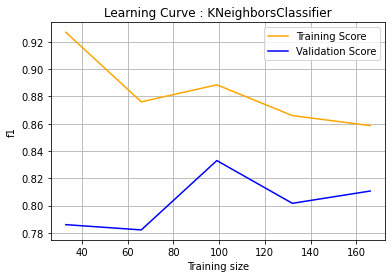

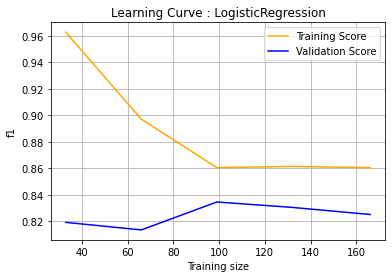

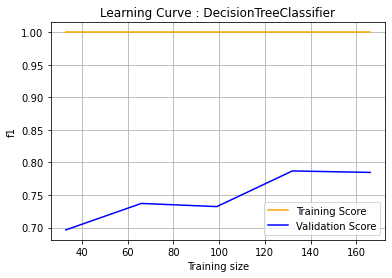

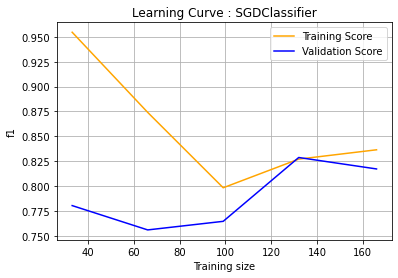

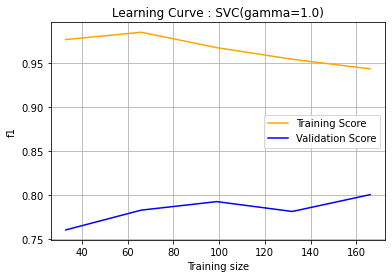

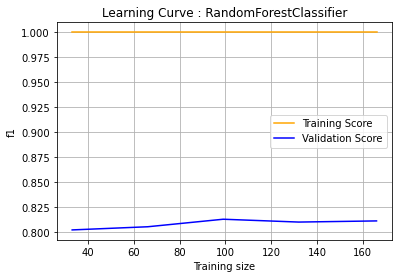

In [39]:
models = train_models(models,X_train,Y_train)

For the modelling we are going to choose the following models:
* Logistic Regression
* Support Vector Machine
* KNN

In [40]:
svm = models['svm']
lr = models['logreg']
knn = models['knn']

### Logistic Regression

----- Testing the model -----
Accuracy Score :  0.9
Classification reports: 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.92      0.90      0.91        49

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



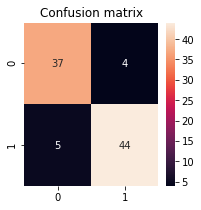

In [41]:
testing(lr,X_test,Y_test)

Best Parameter:  {'C': 8}
Best Score: 0.8212399918921658
----- Testing the model -----
Accuracy Score :  0.9
Classification reports: 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.92      0.90      0.91        49

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



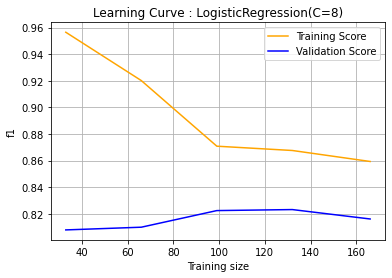

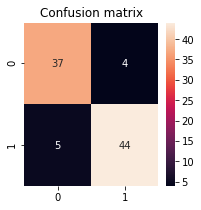

In [42]:
grid = {'C':[0.001,8,15]}
lr = optimize_model(lr,X_train,Y_train,param_grid=grid,scoring='f1')
plot_learning_curve(lr,X_train,Y_train,scoring='f1')
testing(lr,X_test,Y_test)

### Support Vector Machine
It is time to test and tune the Support Vector Machine

----- Testing the model -----
Accuracy Score :  0.8333333333333334
Classification reports: 

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        49

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90



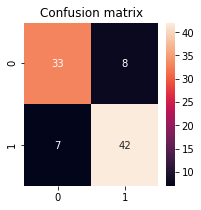

In [43]:
testing(svm,X_test,Y_test)

Best Parameter:  {'C': 450, 'gamma': 0.001}
Best Score: 0.8523501619153795


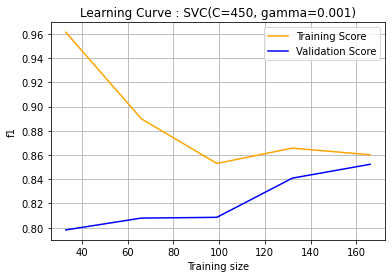

In [44]:
grid = {'C':[450,455,425],'gamma':[0.001,0.5,1]}
svm = optimize_model(svm,X_train,Y_train,param_grid=grid,scoring='f1')
plot_learning_curve(svm,X_train,Y_train,scoring='f1')

----- Testing the model -----
Accuracy Score :  0.9
Classification reports: 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.92      0.90      0.91        49

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



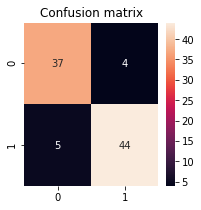

In [45]:
testing(svm,X_test,Y_test)

### KNN Classifier

----- Testing the model -----
Accuracy Score :  0.8666666666666667
Classification reports: 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        49

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90



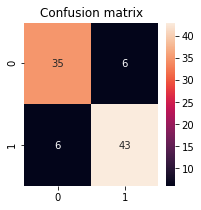

In [46]:
testing(knn,X_test,Y_test)

Best Parameter:  {'n_neighbors': 10}
Best Score: 0.8243473869126043


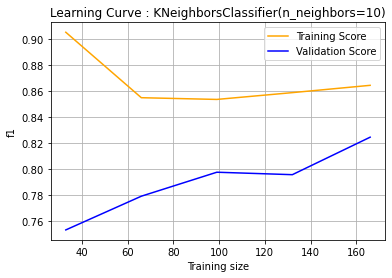

In [47]:
grid = {'n_neighbors':[5,10,15,20]}
knn =optimize_model(knn,X_train,Y_train,param_grid=grid,scoring='f1')
plot_learning_curve(knn,X_train,Y_train)

### Ensemble approach: Stacking Classifier

In [48]:
from sklearn.ensemble import StackingClassifier
st = StackingClassifier(estimators=[('knn',knn),('LogisticRegression',lr),('svm',svm)],final_estimator=SGDClassifier(loss='log_loss'))
st.fit(X_train,Y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('LogisticRegression', LogisticRegression(C=8)),
                               ('svm', SVC(C=450, gamma=0.001))],
                   final_estimator=SGDClassifier(loss='log_loss'))

----- Testing the model -----
Accuracy Score :  0.5555555555555556
Classification reports: 

              precision    recall  f1-score   support

           0       1.00      0.02      0.05        41
           1       0.55      1.00      0.71        49

    accuracy                           0.56        90
   macro avg       0.78      0.51      0.38        90
weighted avg       0.76      0.56      0.41        90



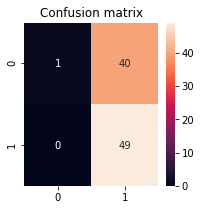

In [49]:
testing(st,X_test,Y_test)

In [627]:
import pickle
def save_model(model,file_name):
    pickl = {'model':model}
    pickle.dump(pickl,open(file_name+".p","wb"))

def load_models(file_name):
    with open(file_name,'rb') as pickled:
        data = pickle.load(pickled)
        model = data['model']
    return model

In [50]:
model_1 = make_pipeline(preprocessor,svm)
model_2 = make_pipeline(preprocessor,lr)
model_3 = make_pipeline(preprocessor,knn)

In [630]:
save_model(model_1,'svm_')
save_model(model_2,'lr_')
save_model(model_3,'knn_')